# KineticDataset tutorial

This tutorial describes the functionality of the **'kinetic'** subpackage of the PAA repo. The subpackage incorporates the KineticDataset class that provides a framework to load and analyze raw data files from multiplexed fluorogenic
assays generated directly by measurement instruments (e.g., fluorimeters). Additionally, the package supports visualization of inputs from retrospective screens, for which a matrix summarizing cleavage efficiencies across a set of samples may have already been produced.


To demo the package, we will load raw files from a retrospective in vitro screen of a panel of lung cancer-associated recombinant proteases against a panel of 14 peptide substrate from the Bhatia Lab (Kirkpatrick et al., STM, 2020). We will: 
1. Plot and analyze data from each independent fluorogenic run.
2. Aggregate summary data outputs form individual runs to generate a matrix of samples of interest vs. peptides of interest.
3. Plot aggregated data using relevant visualization tools.

We will first import all necessary packages

In [1]:
pwd

'/Users/mariaalonso/Work/protease_activity_analysis/tutorials'

In [2]:
cd ..


/Users/mariaalonso/Work/protease_activity_analysis


In [3]:
import protease_activity_analysis as paa
from utils import get_output_dir
import pandas as pd
import os

We will next define the necessay inputs to the KineticDataset class:
- **data_path**: path to raw data file to analyze. Raw files consist of matrices of activity measurements for each sample to be analyzed (i.e., n x t, where n is the number of substrates screened and t is the number of time-points recorded).
- **fc_time**: Time at which to calculate fold change in raw intensity from time 0 (the beginning of the run)
- **linear_time** : Time at which to calculate initial rate in raw intensity change/min from time 0 (the beginning of the run)
- **out_dir**: path to output directory to save data to


In [4]:
in_path = 'data/stm_kinetic/MMP13_stm.xlsx'
fc_time = 45
linear_time = 45
out_dir = os.path.join(get_output_dir(), 'KineticTutorial')

#Create a new directory if it does not exist 
if not os.path.exists(out_dir):
    # Create a new directory because it does not exist 
    os.makedirs(out_dir)

## Exploring the KineticDataset class
We will now create a new instance of the 'KineticDataset' class and assign this object to the local variable data.


In [5]:
data = paa.kinetic.KineticDataset(in_path, fc_time, linear_time, out_dir)

Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/KineticTutorial/MMP13


In instantiating the KineticDataset class, the raw data is automatically processed and key output activity measurements are generated including initial rates (intensity/min) and fold changes at user-defined timepoints across substrates. These outputs will also be available after z-scoring such that outputs can be compared between independent runs.

We can explore the processed data using different methods of the KineticDataset class as illustrated below:

In [6]:
# Verify that the data name has been correctly assigned - this will
# correspond to the name given in the first cell 'A1' of the excel sheet
data.get_sample_name()

'MMP13'

In [7]:
# Can access fc over time using get_fc for all samples tested
data.get_fc()

,MMP13-Substrate,0,1,3,5,7,9,11,13,15,...,29,31,33,35,37,39,41,43,45,47
0,Q1,1.0,1.678125,3.026562,4.779687,7.026562,9.456250,11.815625,14.037500,16.343750,...,39.309375,40.576563,41.323437,41.809375,42.051563,42.012500,42.001562,42.004688,42.121875,42.043750
1,Q1,1.0,1.755302,3.166395,5.016313,7.332790,10.032626,12.830343,15.662316,18.618271,...,42.194127,42.907015,43.027732,43.233279,42.938010,42.957586,42.623165,42.698206,42.456770,42.349103
2,Q3,1.0,3.698895,7.875691,12.878453,18.687845,25.154696,31.555249,37.276243,42.356354,...,64.118785,64.538674,64.577348,64.466851,64.088398,64.113260,63.690608,63.339779,63.171271,62.975138
3,Q3,1.0,3.576087,7.394022,12.078804,17.538043,23.500000,29.562500,34.866848,39.627717,...,63.114130,63.986413,63.828804,63.926630,63.309783,63.478261,62.875000,62.788043,62.652174,62.127717
4,Q5,1.0,1.547667,2.271639,3.088951,4.059434,5.044675,6.078580,6.919426,7.666534,...,9.459513,9.400080,9.386518,9.369366,9.260072,9.262465,9.197447,9.150778,9.175907,9.134025
5,Q5,1.0,1.546293,2.185856,2.887257,3.656987,4.472497,5.286642,6.000683,6.638196,...,8.511787,8.464640,8.417151,8.404510,8.384353,8.347113,8.290741,8.282542,8.259652,8.231636
6,Q6,1.0,5.355164,10.491184,16.372796,22.964736,29.435768,35.896725,41.921914,47.579345,...,69.390428,69.128463,68.748111,68.473552,67.987406,67.715365,67.123426,67.057935,66.632242,66.332494
7,Q6,1.0,8.203046,15.649746,23.532995,31.439086,38.725888,45.540609,51.733503,56.992386,...,81.164975,80.781726,80.428934,80.157360,79.302030,79.256345,78.832487,78.573604,78.436548,77.837563
8,Q7,1.0,2.464533,4.132353,6.066609,8.351211,10.792388,13.262111,15.463668,17.592561,...,32.413495,33.459343,34.171280,34.788062,34.852076,34.987024,34.868512,34.774221,34.992215,34.746540
9,Q7,1.0,2.573074,4.224978,6.178034,8.528787,10.991143,13.519929,15.767050,17.898140,...,32.621789,33.685562,34.222321,34.850310,35.087688,35.033658,35.143490,35.140833,35.312666,35.141718


In [8]:
# Can access fc over time averaged between duplicates using get_fc_mean()
data.get_fc_mean()

,0,1,3,5,7,9,11,13,15,17,...,29,31,33,35,37,39,41,43,45,47
MMP13-Substrate,,,,,,,,,,,,,,,,,,,,,
PQ13,1.0,1.104683,1.107438,1.077135,1.074380,1.049587,1.027548,1.019284,0.994490,0.988981,...,0.931129,0.922865,0.925620,0.914601,0.914601,0.917355,0.898072,0.895317,0.903581,0.909091
PQ2,1.0,1.076923,1.051282,1.037296,1.030303,1.000000,1.004662,0.983683,0.972028,0.955711,...,0.888112,0.878788,0.871795,0.878788,0.869464,0.864802,0.869464,0.846154,0.869464,0.864802
PQ3,1.0,9.326901,14.153235,17.729852,20.733258,23.407491,25.862656,27.895573,29.793417,31.658343,...,37.610670,37.561862,37.363224,37.071510,37.046538,36.829739,36.476731,36.652667,36.408627,36.422247
PQ4,1.0,1.104265,1.137441,1.137441,1.142180,1.172986,1.175355,1.206161,1.260664,1.308057,...,1.774882,1.902844,2.021327,2.139810,2.291469,2.419431,2.537915,2.663507,2.827014,2.945498
PX11,1.0,3.494970,5.994970,8.648893,11.364185,14.078471,16.798793,19.267606,21.595573,23.668008,...,33.701207,34.315895,34.610664,34.772636,34.710262,34.633803,34.548290,34.544266,34.586519,34.358149
PX2,1.0,6.094178,10.342466,14.335616,18.337329,22.047945,25.717466,28.828767,31.700342,34.058219,...,41.498288,41.982877,42.210616,42.306507,42.258562,42.318493,42.273973,42.214041,42.316781,42.393836
PX3,1.0,28.620462,49.405941,63.627063,75.841584,86.376238,96.244224,103.646865,109.732673,113.755776,...,117.138614,117.504950,116.993399,116.924092,116.544554,116.250825,115.861386,116.000000,115.485149,114.891089
PX4,1.0,17.507463,27.504975,34.701493,40.161692,44.793532,48.589552,52.338308,55.263682,57.584577,...,67.455224,68.116915,69.156716,69.554726,69.256219,69.383085,69.184080,69.189055,69.323383,69.057214
Q1,1.0,1.715882,3.094972,4.895451,7.176377,9.738228,12.312051,14.832402,17.456504,20.375100,...,40.720670,41.716680,42.157223,42.505986,42.485235,42.474860,42.305666,42.343974,42.285714,42.193136


In [9]:
# Can access fc at time fc_time using get_fc_x
data.get_fc_x()

MMP13-Substrate
PQ13      0.903581
PQ2       0.869464
PQ3      36.408627
PQ4       2.827014
PX11     34.586519
PX2      42.316781
PX3     115.485149
PX4      69.323383
Q1       42.285714
Q3       62.909589
Q5        8.682370
Q6       72.512010
Q7       35.150547
Q9        0.778623
SQ14     19.411061
Name: 45, dtype: float64

In [10]:
# Can access zscores of fc at time fc_time using get_fc_x
data.get_fc_zscore()

,Z-scored fold change at t=45
MMP13-Substrate,
PQ13,-1.104780
PQ2,-1.105845
PQ3,0.003494
PQ4,-1.044741
PX11,-0.053382
PX2,0.187914
PX3,2.471831
PX4,1.030913
Q1,0.186944


In [11]:
# Can access initial rate as calculated from t=0 to t=linear_time
data.get_initial_rate()

,Initial rate at t=45
MMP13-Substrate,
PQ13,-0.388889
PQ2,-0.622222
PQ3,346.611111
PQ4,8.566667
PX11,370.944444
PX2,268.100000
PX3,385.433333
PX4,305.177778
Q1,574.788889


In [12]:
# Can access zscores of initial rates as calculated from t=0 to t=linear_time
data.get_initial_rate_zscore()

,Initial rate at t=45
MMP13-Substrate,
PQ13,-1.276389
PQ2,-1.277309
PQ3,0.091352
PQ4,-1.241090
PX11,0.187265
PX2,-0.218109
PX3,0.244374
PX4,-0.071962
Q1,0.990742


We can also save any of these outputs using the finction 'write_csv' as illustrated below. The function takes in the variable to save as well as the name token to save the file as in your pre-assigned output directory. 

Lets for instance save a .csv with the fold change data at time 45 min for this particular dataset.

In [13]:
# Save output of interest to .csv (e.g. fc at time 45) - created 'MMP13_fc_45.csv' in output directory
data.write_csv(data.get_fc_x(), 'fc_45')

We can also plot raw and fold change data using the function 'plot_kinetic'. It can be helpful to rerun the analyses above after having carefully inspected the raw data to determine the optimal 'fc_time' and 'linear_time' to calculate values at.

<AxesSubplot:title={'center':'MMP13'}, xlabel='Time (min)', ylabel='Raw Intensity'>

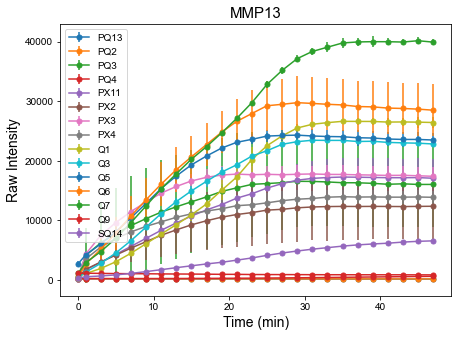

In [14]:
# Plot raw kinetic data - also saves 'MMP13_Fold Change_kinetic.pdf' in output folder
data.plot_kinetic(data.get_raw(), title = data.sample_name, ylabel = 'Raw Intensity', close_plot=False)

<AxesSubplot:title={'center':'MMP13'}, xlabel='Time (min)', ylabel='Fold Change'>

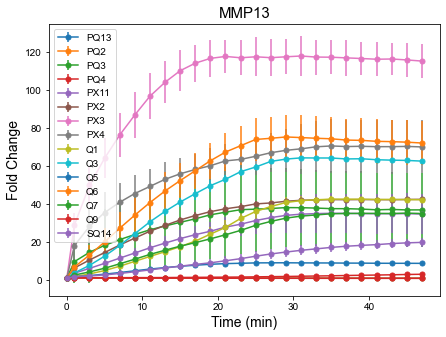

In [15]:
# Plot kinetic data as a function of fold change over time -  saves 'MMP13_Fold Change_kinetic.pdf' in output folder
data.plot_kinetic(data.get_fc(), title = data.sample_name, ylabel = 'Fold Change', close_plot=False)

## Applying the KineticDataset class across a list of files corresponding to a screen

Having explored the KineticDataset class, we will now apply it across multiple raw files belonging to the same screen to demonstrate the ease to profile multiple files automatically. 

Here we have selected fold change at 45 minutes as the clevage efficiency metric to record for each protease for this particular screen (as per Kirkpatrick et al.), but the optimal cleavage efficeincy metric may vary frm application to application and is user defined.

In [16]:
# Define path for folder where all raw input files for a screen are saved, load and analyze all relevant data, save fc as csv for subsequent data aggregation and visualization
in_path = 'data/stm_kinetic'
fc_time = 45
linear_time = 45
out_dir = get_output_dir()
sample_list = []

for filename in os.listdir(in_path):
    if not filename.startswith('.'):
        print('Analyzing ', filename)
        full_file_path = os.path.join(in_path, filename)
        data_temp = paa.kinetic.KineticDataset(full_file_path, fc_time, linear_time, out_dir)
        data_temp.write_csv(data_temp.get_fc_x(), 'fc_45')
        sample_list.append(data_temp.get_sample_name())
    
print(sample_list) 

Analyzing  PRSS22_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/PRSS22
Analyzing  KLK14_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/KLK14
Analyzing  MMP11_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/MMP11
Analyzing  MMP3_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/MMP3
Analyzing  NAPSA_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/NAPSA
Analyzing  KLK13_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/KLK13
Analyzing  ACE2_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/ACE2
Analyzing  KLK6_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/KLK6
Analyzing  CTSD_stm.xlsx
Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/CTSD
Analyzing  PRSS8_stm.xlsx

## Aggregating summary data outputs form individual runs 

We will now take the output files generated and aggregate them into a summary matrix for the screen using 'paa.vis.aggregate_data'. This function takes two inputs:
- **data_in_paths** (list of strings): path for datafiles
- **out_path** (str): path to store the results

In [17]:
# Get all paths to output files of interest (e.g. FC at 45 min), for proteases of interest, here all proteases in the recombinant screen
fc_files = []
for prot in sample_list:
    fc_files.append(os.path.join(out_dir, prot, str(prot)+'_fc_45.csv'))

    
# Define name of screen that summarizes output files of interest and generate matrix of sample vs. substrate
screen_name = 'STM screen'
screen_out_dir = os.path.join(out_dir, screen_name)

if not os.path.exists(screen_out_dir):
    os.makedirs(screen_out_dir)
    print('Directory created', screen_out_dir)

agg_df = paa.vis.aggregate_data(fc_files, screen_out_dir, 'STM_agg')

Directory created /Users/mariaalonso/Work/protease_activity_analysis/outputs/STM screen


In [18]:
# Visualize matrix
agg_df.columns = sample_list
agg_df

,PRSS22,KLK14,MMP11,MMP3,NAPSA,KLK13,ACE2,KLK6,CTSD,PRSS8,PRSS3,F7,MMP13,MMP12,MMP1
,,,,,,,,,,,,,,,
PQ13,0.742081,0.862191,0.875312,0.773836,0.909091,0.898810,0.622857,1.053719,1.125000,0.856223,3.979434,0.602606,0.903581,0.854067,0.664740
PQ2,0.842508,0.967495,0.919149,0.769912,0.923077,1.139887,0.717172,7.062016,0.871795,0.949580,41.783730,0.894144,0.869464,0.893617,0.778195
PQ3,0.704388,0.796204,0.657116,0.565111,1.601770,0.877950,0.644478,0.846112,2.393939,0.655000,0.641091,0.511084,36.408627,12.832613,4.660754
PQ4,0.745431,0.883392,0.923246,0.759924,11.960000,1.153322,0.740566,1.944186,11.791667,0.832051,44.145511,0.691288,2.827014,1.298851,0.900000
PX11,0.758686,0.866025,0.878007,0.700957,10.500000,0.878497,0.680812,1.188312,26.200000,0.865443,1.332231,0.714700,34.586519,17.077706,15.598722
PX2,0.759104,0.889625,0.877329,0.730024,1.018519,0.925170,0.699858,1.028953,1.068182,0.976654,29.998626,0.674099,42.316781,4.231281,1.437299
PX3,0.791262,0.941860,0.859223,0.763359,1.000000,0.934694,0.885714,1.055901,1.000000,0.937343,0.857143,0.699387,115.485149,64.215743,41.528024
PX4,0.841837,0.903448,0.750400,0.872694,1.034483,0.917112,0.779951,1.259887,1.166667,0.730812,0.733696,0.688636,69.323383,18.196581,3.023377
Q1,0.718103,0.837414,0.732537,0.769671,1.000000,0.880543,0.668717,1.070853,0.934783,0.772890,0.720618,0.668932,42.285714,4.175862,4.960861


## Plot aggregated data using relevant visualization tools in 'vis.py'
We will now call functions in our visualizatoin package 'vis' to make sense of the data in the screen.

We will start by defining relevant color dictionaries to help interpret the data.

In [19]:
# Define dictionary that maps specific protease classes to specific colors
prot_col_map = {'Metallo': 'tab:green', 'Serine': 'tab:orange','Aspartic': 'tab:purple'}
print(prot_col_map)

# Define dictionary of interest for substrates - here color could represent susceptibility to protease class. Note that this is a fake color mapping
class_data_row = ['Metallo', 'Serine', 'Metallo', 'Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo']

fake_row_df = pd.DataFrame(data = {'Class': class_data_row}, index=agg_df.index)
display(fake_row_df)

# Define dictionary for proteases (in sample list) as a function of class
class_data_col = [paa.protease.classify_protease(prot) for prot in sample_list ]

col_df = pd.DataFrame(data = {'Class': class_data_col}, index=sample_list)
display(col_df)


{'Metallo': 'tab:green', 'Serine': 'tab:orange', 'Aspartic': 'tab:purple'}


,Class
,
PQ13,Metallo
PQ2,Serine
PQ3,Metallo
PQ4,Serine
PX11,Metallo
PX2,Serine
PX3,Metallo
PX4,Serine
Q1,Metallo


,Class
PRSS22,Serine
KLK14,Serine
MMP11,Metallo
MMP3,Metallo
NAPSA,Aspartic
KLK13,Serine
ACE2,Metallo
KLK6,Serine
CTSD,Aspartic
PRSS8,Serine


In [20]:
# Generate lists corresponding to ordered colors for the rows and columns 
# using pandas df with classification information and color mapping dictionary

col_df['Color'] = col_df['Class'].map(prot_col_map)
cols_col = list(col_df['Color'].values)
print(cols_col)

['tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:purple', 'tab:orange', 'tab:green', 'tab:orange', 'tab:purple', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:green']


### Hierarchical clustering

We will now visualize the cleavage data across all protease-substrate pairs using hierarchical clustering using 'paa.vis.plot_heatmap'. This will genrate a heatmap of cleavage efficiencies and cluster substrates and proteases with similar cleavage profiles together along the x and y axes. 

Transposing the matrix is optional, and is defined by the user for aesthetic purposes.

,PQ13,PQ2,PQ3,PQ4,PX11,PX2,PX3,PX4,Q1,Q3,Q5,Q6,Q7,Q9,SQ14
PRSS22,-0.430351,-0.247238,-0.505558,-0.423854,-0.398425,-0.397631,-0.337772,-0.248388,-0.477738,-0.728070,-0.667261,-0.191515,-0.469271,-0.497351,-0.480659
KLK14,-0.213921,-0.047674,-0.328790,-0.178874,-0.207520,-0.168731,-0.086415,-0.146486,-0.255987,-0.306935,-0.266389,-0.131825,-0.150874,-0.154618,-0.049261
MMP11,-0.192131,-0.121629,-0.605779,-0.115214,-0.187696,-0.188810,-0.218895,-0.414268,-0.449027,-0.476854,-0.534749,-0.195036,-0.308096,-0.316141,-0.379952
MMP3,-0.369900,-0.377235,-0.823395,-0.396072,-0.512602,-0.453984,-0.389567,-0.196453,-0.377686,-0.438553,-0.586667,-0.284153,-0.370950,-0.411138,-0.412738
NAPSA,-0.137504,-0.115477,0.679667,3.580145,3.392317,0.026472,0.000000,0.048910,0.000000,0.819428,2.085104,0.402098,0.256340,0.259867,-0.089267
KLK13,-0.153913,0.188890,-0.187790,0.205795,-0.186892,-0.112210,-0.097434,-0.124830,-0.183535,-0.275268,-0.255144,0.307860,-0.093874,-0.113463,-0.010387
ACE2,-0.683027,-0.479610,-0.633797,-0.433300,-0.554672,-0.514866,-0.175087,-0.358544,-0.580532,-0.539256,-0.645694,-0.217685,-0.127704,-0.436099,-0.450344
KLK6,0.075490,2.820080,-0.241080,0.959166,0.248913,0.041177,0.078474,0.333294,0.098761,0.076452,0.020743,3.767364,2.294779,0.648090,-0.046047
CTSD,0.169925,-0.197939,1.259387,3.559696,4.711495,0.095157,0.000000,0.222392,-0.097297,0.467126,2.536753,0.311944,0.280108,0.489385,-0.034765
PRSS8,-0.223941,-0.074639,-0.610433,-0.265256,-0.208489,-0.034081,-0.093350,-0.452428,-0.371664,-0.686808,-0.565558,-0.255021,-0.141687,-0.371077,-0.144619


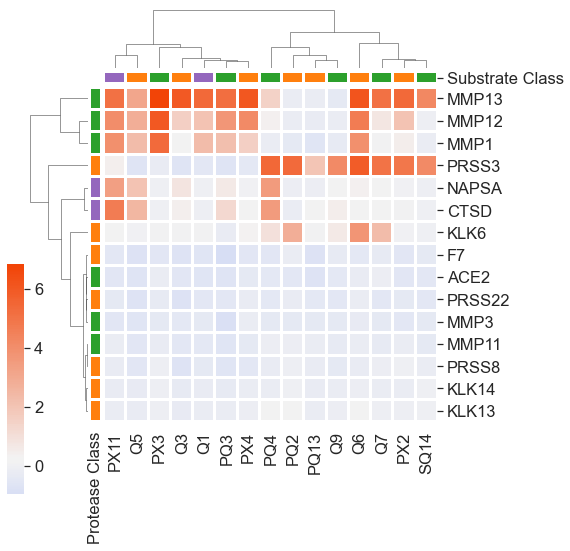

In [21]:
# Transpose matrix, perform hierarchical clustering and plot heatmap
agg_df_t = agg_df.T
paa.vis.plot_heatmap(agg_df_t, screen_out_dir, row_colors=cols_col, col_colors=cols_col, center=0.2,  metric='euclidean', method='ward', scale='log2')

### Data scaling
We will next scale the data for subsequent analysis. This is particularly useful when comparing independent runs.

In [22]:
# Scale the data, save it as a .csv file and display it 
scaled_data = paa.vis.scale_data(agg_df)
zscore_save_path = os.path.join(screen_out_dir, screen_name+"_z_scored.csv")
scaled_data.to_csv(zscore_save_path, index=False)
display(scaled_data)

,PRSS22,KLK14,MMP11,MMP3,NAPSA,KLK13,ACE2,KLK6,CTSD,PRSS8,PRSS3,F7,MMP13,MMP12,MMP1
,,,,,,,,,,,,,,,
PQ13,-0.026709,-0.440734,0.804867,0.401408,-0.521511,-0.496315,-1.278093,-0.469083,-0.422155,0.339795,-0.670890,-1.022798,-1.104780,-0.622236,-0.557925
PQ2,1.377068,1.651561,1.336453,0.342419,-0.517455,1.542930,-0.195897,1.304769,-0.460607,1.207829,1.288539,2.058151,-1.105845,-0.619784,-0.547145
PQ3,-0.553595,-1.751822,-1.841050,-2.735978,-0.320611,-0.672768,-1.030008,-0.530375,-0.229451,-1.531185,-0.843919,-1.989995,0.003494,0.120295,-0.178254
PQ4,0.020109,-0.019483,1.386131,0.192301,2.683626,1.656579,0.072537,-0.206187,1.197705,0.115044,1.410952,-0.085615,-1.044741,-0.594664,-0.535572
PX11,0.205393,-0.364562,0.837549,-0.694049,2.260177,-0.668141,-0.613103,-0.429347,3.385782,0.425525,-0.808097,0.161804,-0.053382,0.383442,0.860988
PX2,0.211231,0.104351,0.829331,-0.257134,-0.489774,-0.273334,-0.394563,-0.476395,-0.430783,1.459562,0.677707,-0.267260,0.187914,-0.412888,-0.484522
PX3,0.660748,1.142223,0.609773,0.243924,-0.495145,-0.192773,1.738015,-0.468439,-0.441138,1.094053,-0.832721,-0.000029,2.471831,3.305453,3.324593
PX4,1.367689,0.379011,-0.709859,1.887356,-0.485143,-0.341494,0.524454,-0.408215,-0.415827,-0.826282,-0.839120,-0.113636,1.030913,0.452799,-0.333825
Q1,-0.361891,-0.933019,-0.926476,0.338803,-0.495145,-0.650830,-0.751882,-0.464024,-0.451042,-0.435035,-0.839798,-0.321869,0.186944,-0.416323,-0.149740


### Correlation Matrix
We will next plot pairwise correlations across the scaled data for all proteases screened.

Two different correlation coefficients are available: Pearson and Spearman.

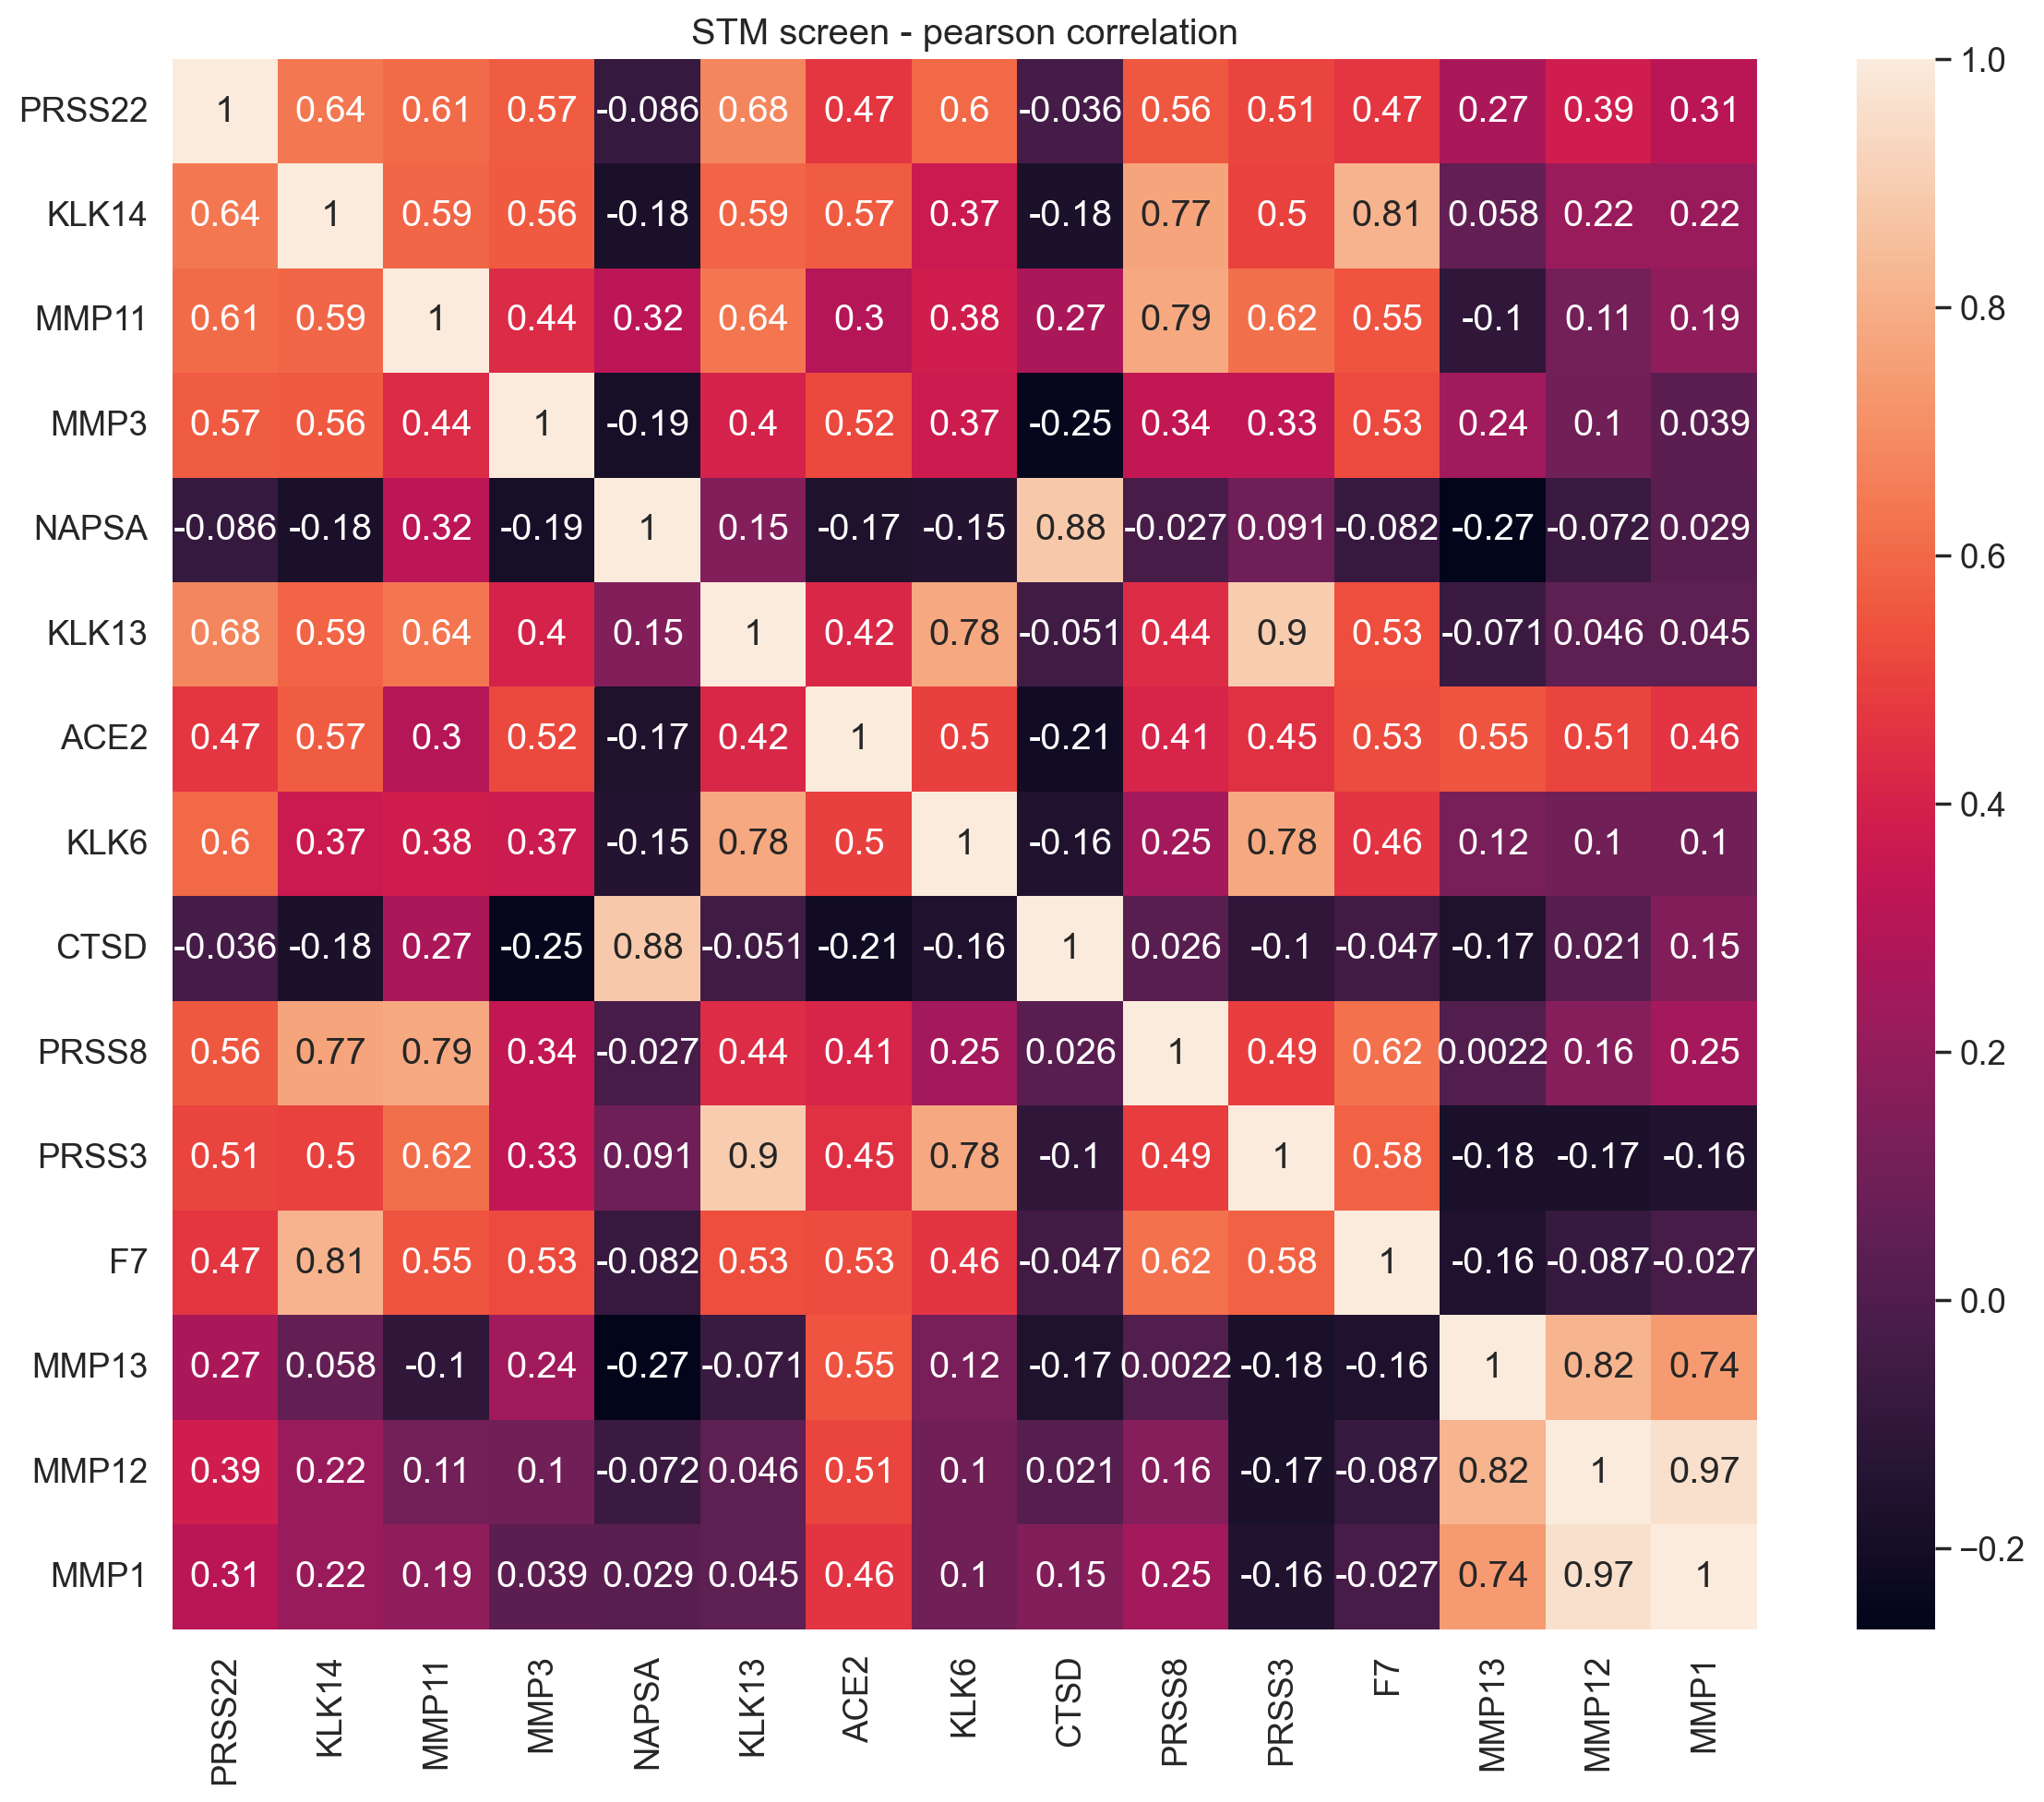

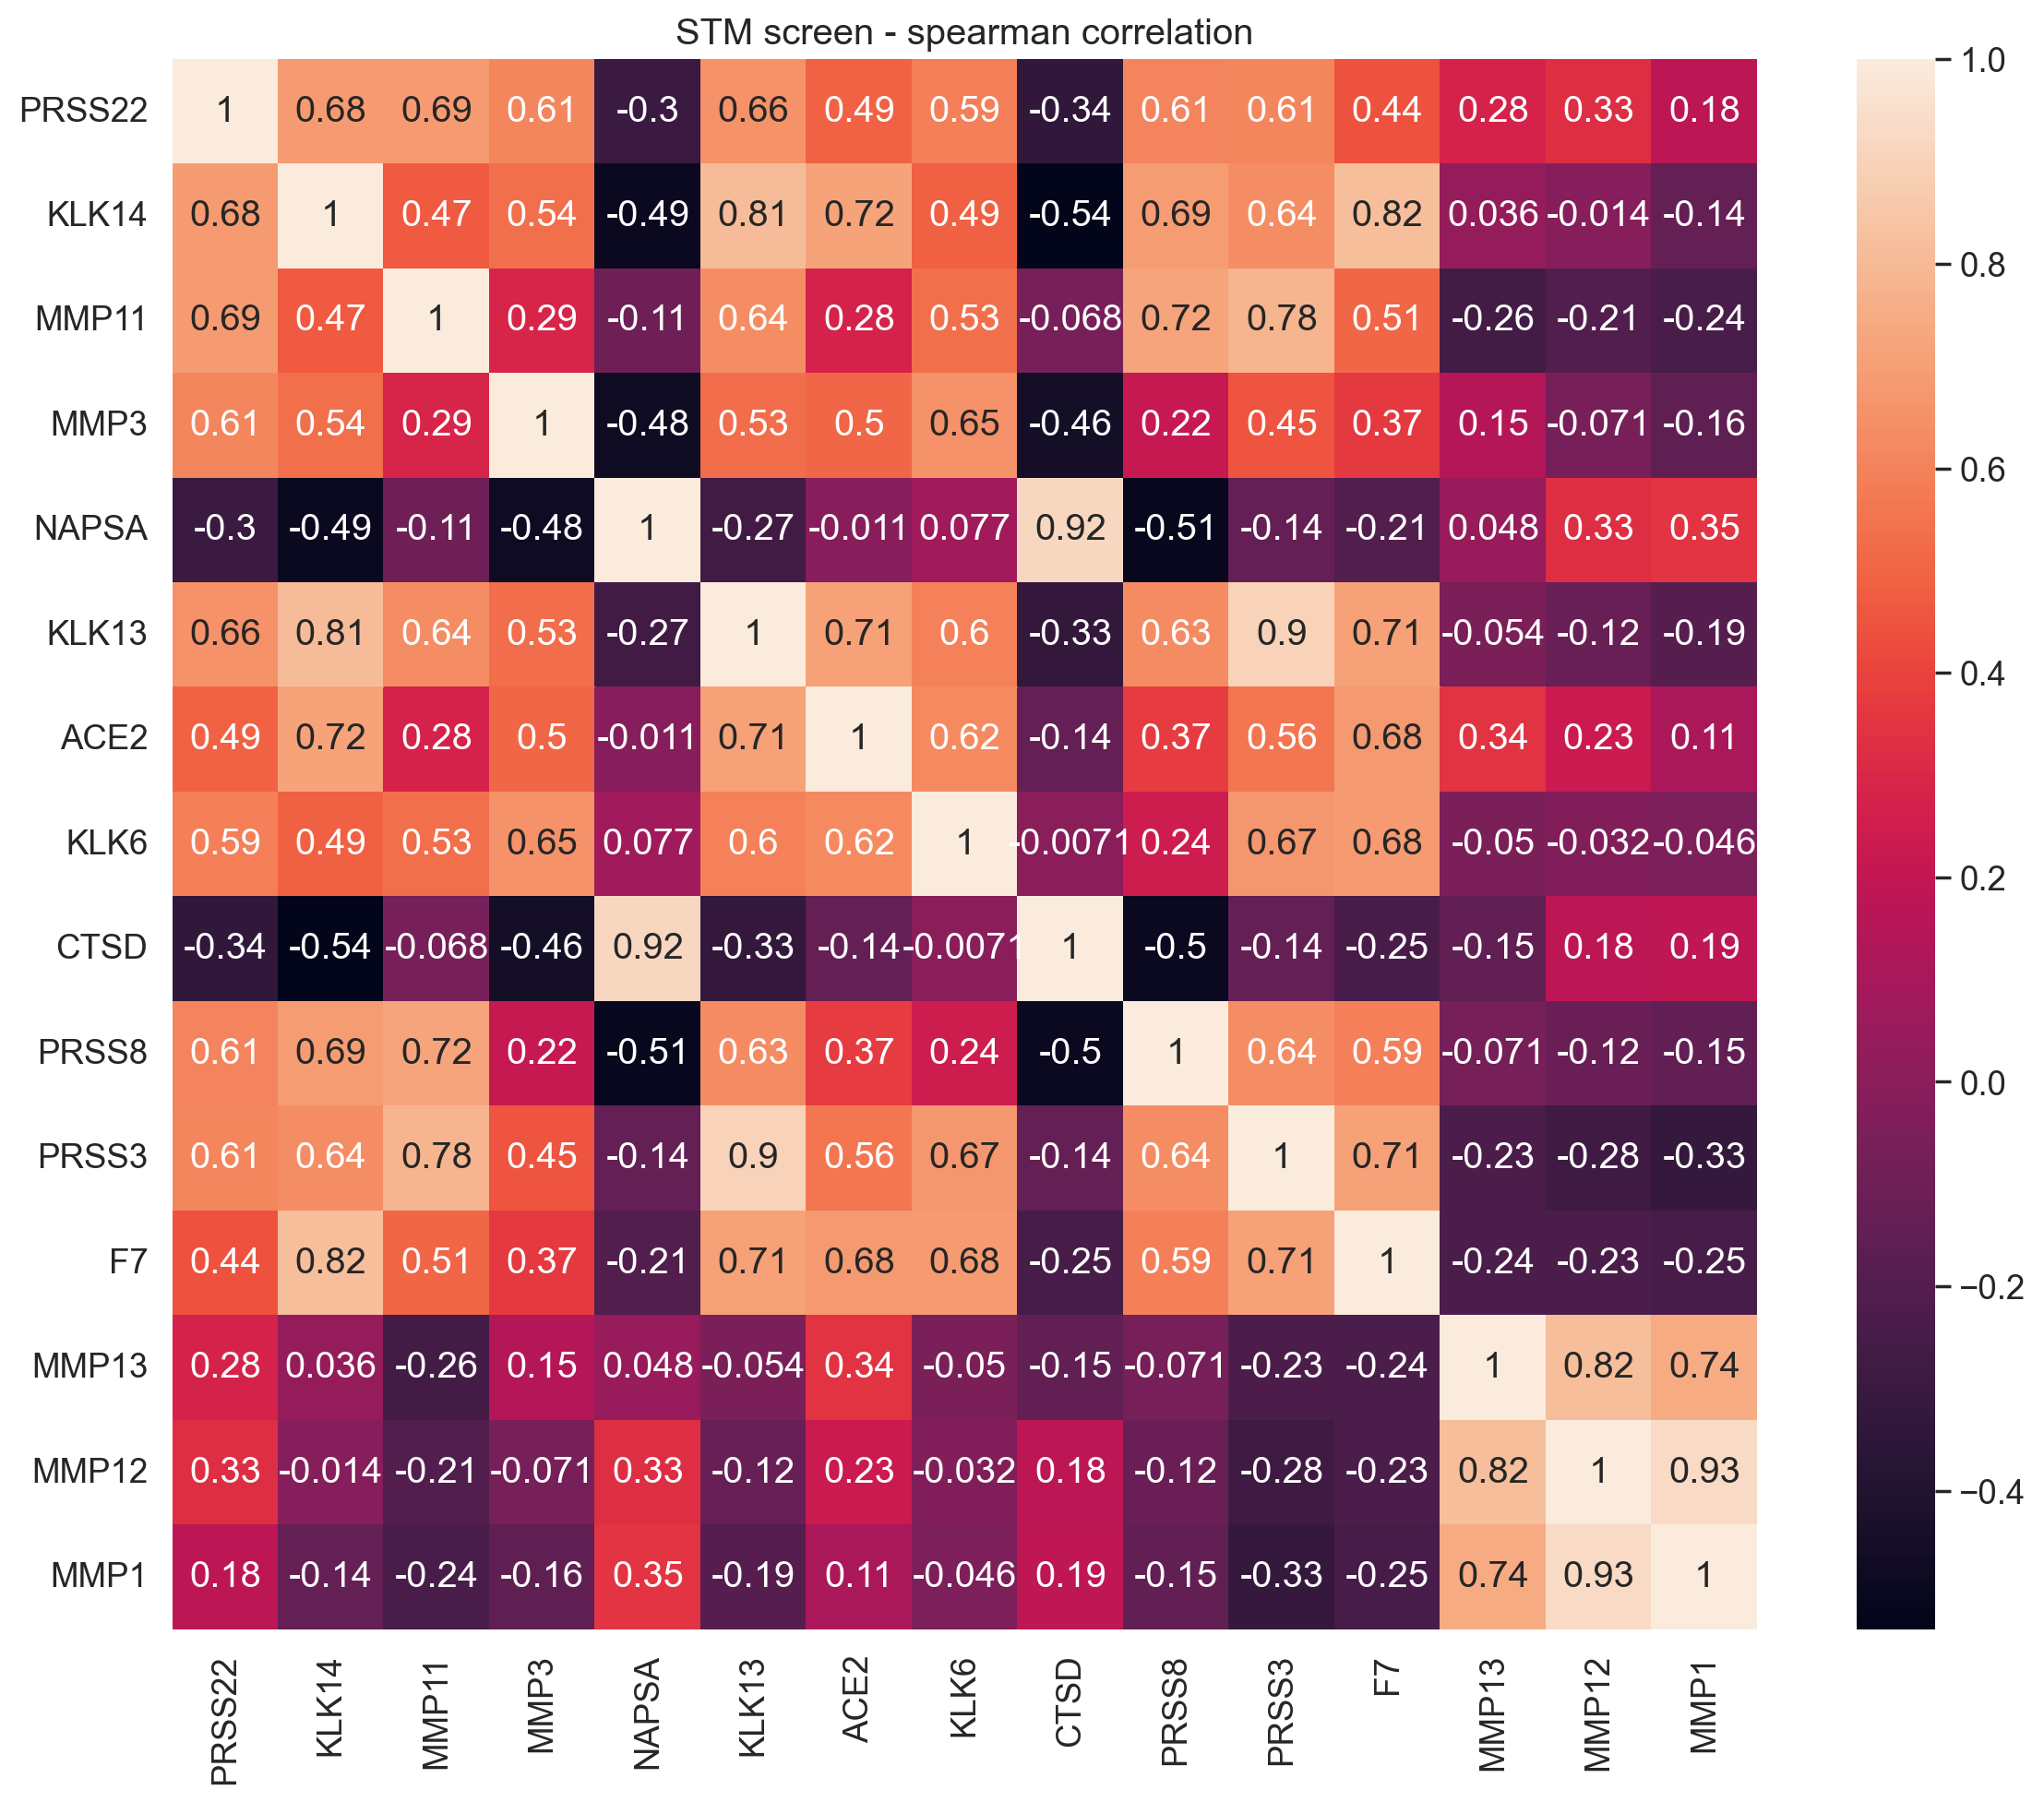

In [23]:
# Plot correlation matrix as defined by the pearson or spearman correlation 
corr_matrix_pearson = paa.vis.plot_correlation_matrix(scaled_data, screen_name, screen_out_dir, method='pearson');
corr_matrix_spear = paa.vis.plot_correlation_matrix(scaled_data, screen_name, screen_out_dir, method='spearman');

### Scatterplots
Inspection of the correlation matrix may help identify proteases that were particularly similar (e.g. MMP12 and MMP13) or dissimilar (e.g. MMP3 and NAPSA).

To get a better understanding of what the cleavage profile for these protease pairs looks like at the substrate-level, we can use scatterplots of z-scored cleavage efficiencies to plot proteases of interest against each other. Running 'paa.vis.plot_zscore_scatter' will generate scatterplots across all protease pairs in a matrix provided.

Since pariwise plots are generated for all proteases in the screen, plots will automatically be closed to save memory. However they are accessible at to your selected directory.

In [24]:
# Use paa.vis.plot_zscore_scatter to generate scatterplots of zscores for all possible pairwise combinations of samples
paa.vis.plot_zscore_scatter(scaled_data, screen_out_dir, corr_matrix_pearson, corr_matrix_spear)

### Cleavage efficiency histograms
Additionally, we can also use 'paa.vis.plot_zscore_hist' to plot histograms of z-scores for each proterase/sample.  

This could be helpful for QC or to determine how promiscuous vs. 
specifically a given sample cleaves the substrate library queried.

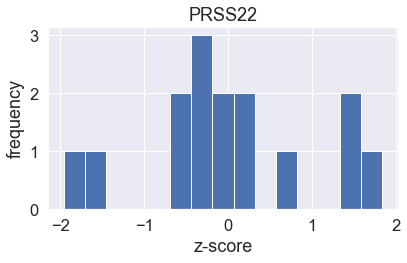

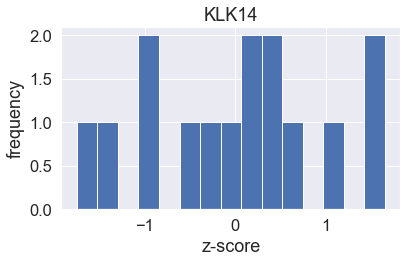

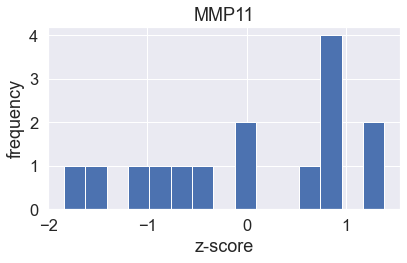

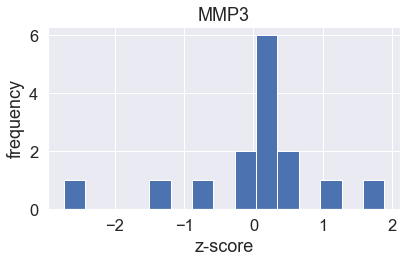

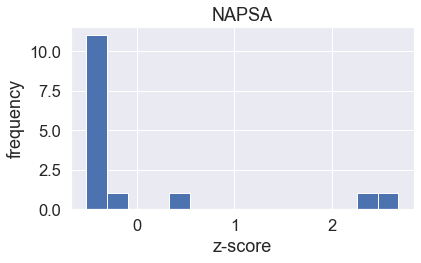

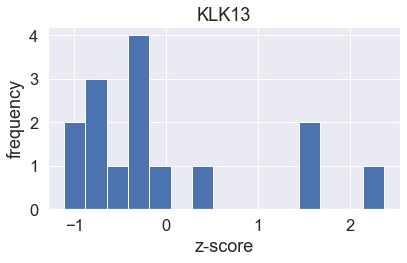

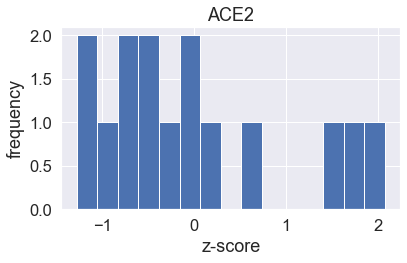

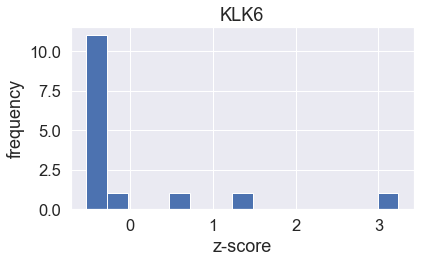

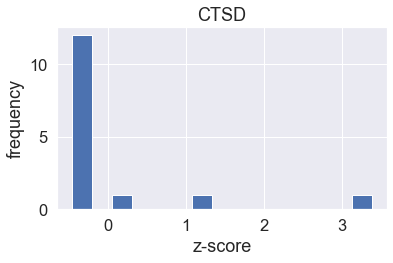

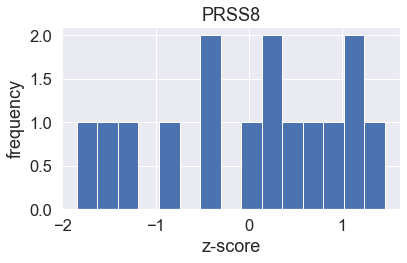

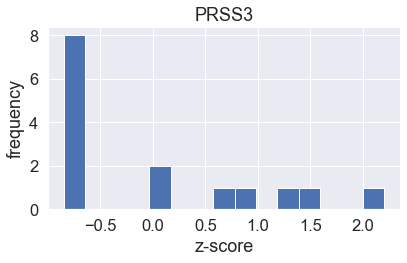

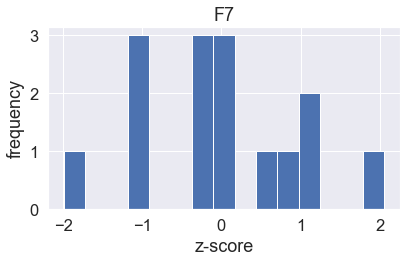

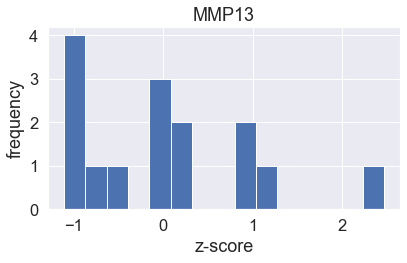

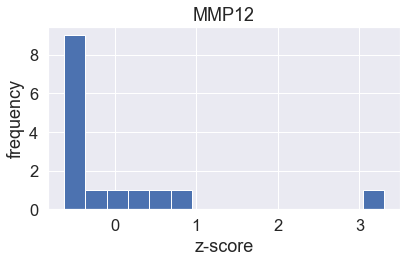

In [25]:
# Plot z-scored histograms of cleavage efficiency
paa.vis.plot_zscore_hist(scaled_data, screen_out_dir)

### Find top hits for a screen

We can use 'paa.vis.top_n_hits' to find the top substrates for each of the proteases/samples screened in a given screen.

In [26]:
# Requires defining ind_dict (dictionary with keys = substrate index in data_matrix and values = substrate name)
ind_dict = pd.Series(agg_df.index, index=range(agg_df.shape[0])).to_dict()
print('ind_dict:', ind_dict)

# Get top n=4 hits
paa.vis.top_n_hits(agg_df, ind_dict, screen_out_dir, n=4)

ind_dict: {0: 'PQ13', 1: 'PQ2', 2: 'PQ3', 3: 'PQ4', 4: 'PX11', 5: 'PX2', 6: 'PX3', 7: 'PX4', 8: 'Q1', 9: 'Q3', 10: 'Q5', 11: 'Q6', 12: 'Q7', 13: 'Q9', 14: 'SQ14'}


,PRSS22,KLK14,MMP11,MMP3,NAPSA,KLK13,ACE2,KLK6,CTSD,PRSS8,PRSS3,F7,MMP13,MMP12,MMP1
0,Q6,PQ2,PQ4,PX4,PQ4,Q6,Q7,Q6,PX11,PX2,Q6,PQ2,PX3,PX3,PX3
1,PQ2,SQ14,PQ2,Q6,PX11,PQ4,PX3,PQ2,PQ4,PQ2,PQ4,Q9,Q6,Q6,Q6
2,PX4,PX3,PX11,PQ13,Q5,PQ2,Q6,Q7,Q5,PX3,PQ2,Q7,PX4,PX4,PX11
3,PX3,Q6,PX2,Q7,Q3,SQ14,PX4,PQ4,PQ3,Q7,Q7,SQ14,Q3,PX11,Q1


Alternatively, we can display all substrates that are cleavaed above a speciifc z-score threshold using 'paa.vis.threshold_substrates'.

In [27]:
thresh_df = paa.vis.threshold_substrates(scaled_data, ind_dict, screen_out_dir, threshold=0)
thresh_df

,PRSS22,KLK14,MMP11,MMP3,NAPSA,KLK13,ACE2,KLK6,CTSD,PRSS8,PRSS3,F7,MMP13,MMP12,MMP1
0,Q6,PQ2,PQ4,PX4,PQ4,Q6,Q7,Q6,PX11,PX2,Q6,PQ2,PX3,PX3,PX3
1,PQ2,SQ14,PQ2,Q6,PX11,PQ4,PX3,PQ2,PQ4,PQ2,PQ4,Q9,Q6,Q6,Q6
2,PX4,PX3,PX11,PQ13,Q5,PQ2,Q6,Q7,Q5,PX3,PQ2,Q7,PX4,PX4,PX11
3,PX3,Q6,PX2,Q7,NaN,SQ14,PX4,NaN,NaN,Q7,Q7,SQ14,Q3,PX11,NaN
4,PX2,PX4,PQ13,PQ2,NaN,NaN,PQ4,NaN,NaN,SQ14,PX2,Q6,PX2,PQ3,NaN
5,PX11,Q7,Q6,Q1,NaN,NaN,Q9,NaN,NaN,PX11,Q9,PX11,Q1,NaN,NaN
6,PQ4,Q9,PX3,PX3,NaN,NaN,NaN,NaN,NaN,PQ13,SQ14,NaN,PQ3,NaN,NaN
7,NaN,PX2,NaN,PQ4,NaN,NaN,NaN,NaN,NaN,Q6,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Q9,NaN,NaN,NaN,NaN,NaN,PQ4,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,SQ14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pie charts for class membership 
We can also leverage pie charts to plot a specific feature of substrates cleaved above z_threshold for each protease. For instance, this feature could be membership to a specific library of interest, or the target protease class for which a given substrate was designed (used here and described by 'metallo' or 'serine'). 

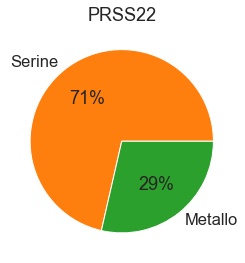

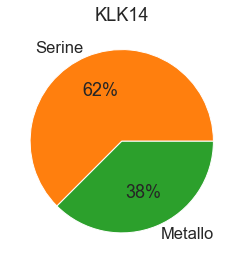

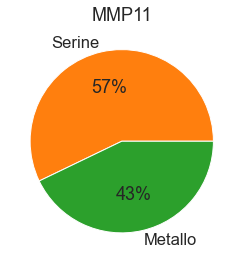

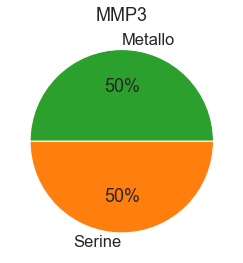

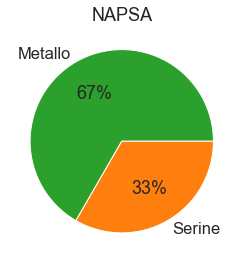

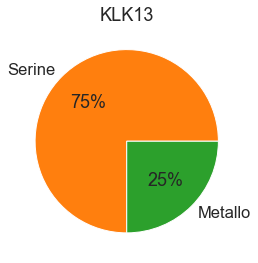

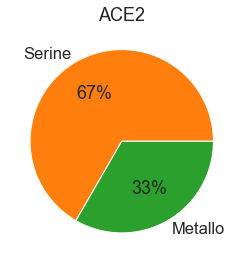

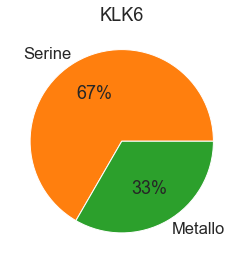

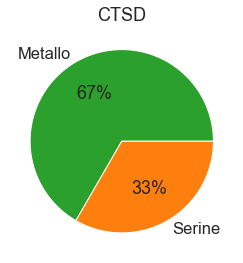

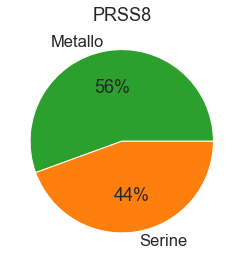

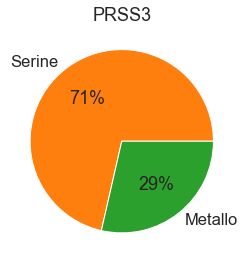

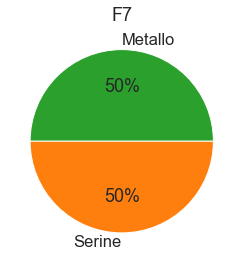

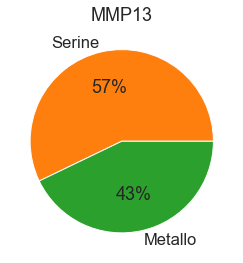

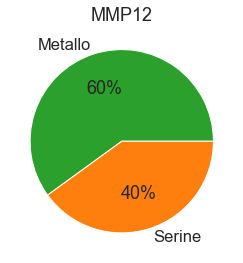

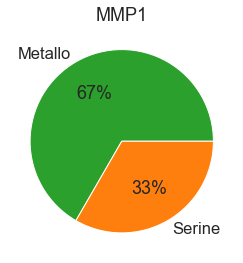

In [28]:
# Use paa.vis.plot_substrate_class_pie to plot pie chart of substrates cleavaed above z_threshold, color coded by susceptibility to protease class in fake_row_df
paa.vis.plot_substrate_class_pie(thresh_df, fake_row_df, prot_col_map, screen_out_dir)

### Specifivity vs. Efficiency (SvE) plts
The specificity vs. efficiency correlation plots (“SvE” plots) enable identification of optimal protease-substrate pairs from in vitro activity assays.

SvE plots are generated by calculating the z-scores across the screened substrates, which serves as a surrogate metric for cleavage efficiency, and z-scores across the screened proteases, which serves as a surrogate metric for specificity. 

By plotting these metrics against each other, optimal substrate-protease pairs can be rapidly identified from large sets of screening data by identifying substrates that score high for both of these metrics.

In addition, annotation by the raw activity measurement values for each protease-substrate pair reflects the absolute cleavage rate of a substrate of interest and overcomes the relative nature of standard scoring.

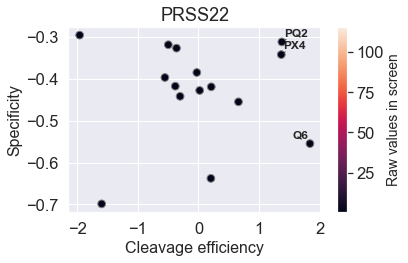

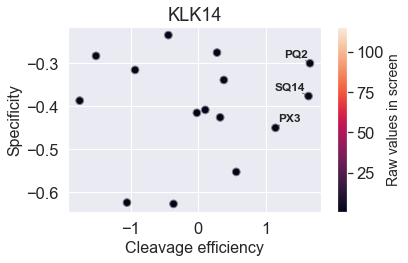

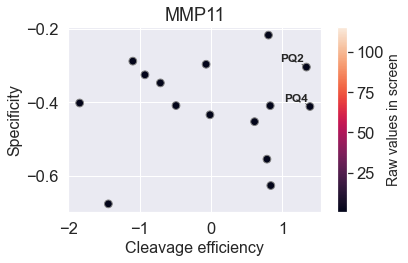

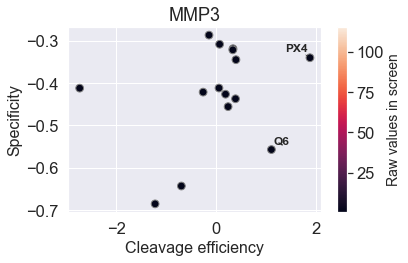

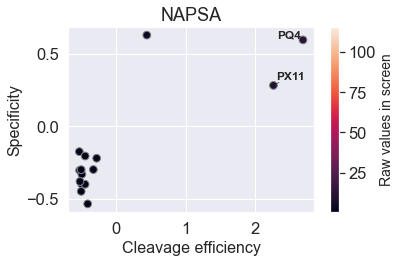

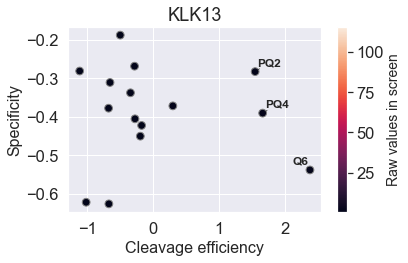

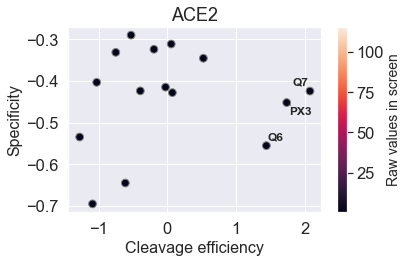

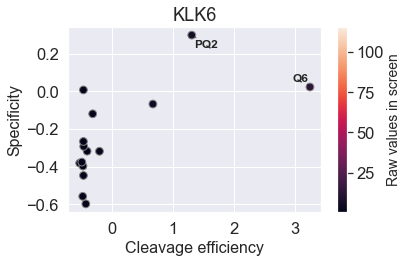

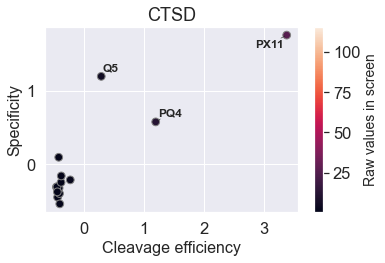

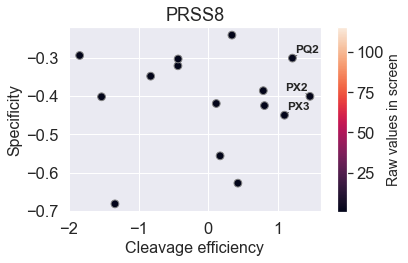

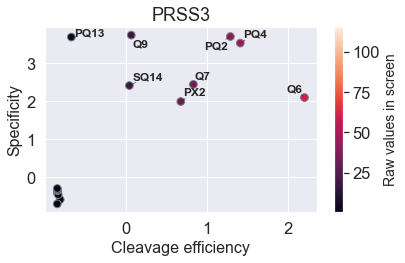

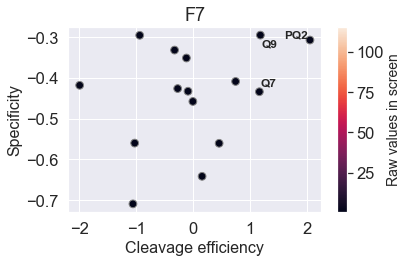

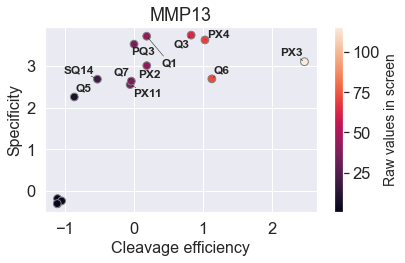

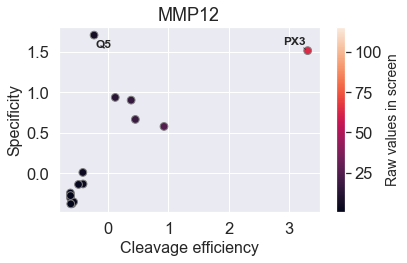

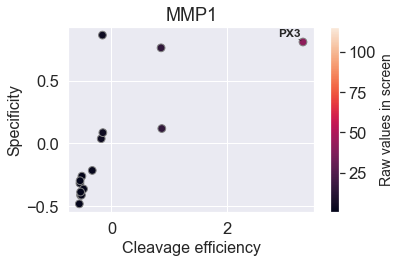

In [29]:
# We will start by plotting SvEs for proteases in the screen using 'paa.vis.plot_specificity_sample'
paa.vis.plot_specificity_sample(agg_df, screen_out_dir, threshold=1, close_plot=False, cmap=True)

We will next plot SvEs for substrates in the screen instead using 'paa.vis.plot_specificity_substrate'. Additionally, this color-coded proteases as a function of their catalytic class.

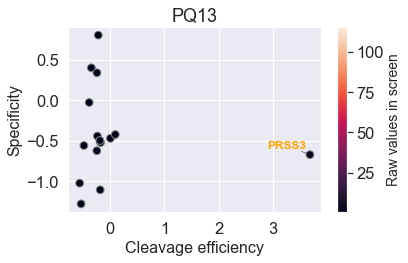

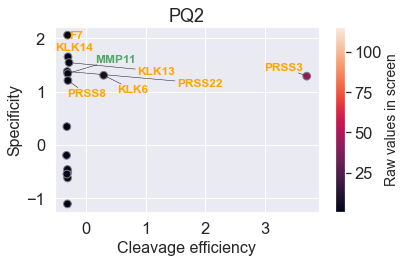

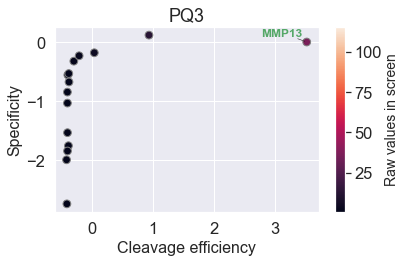

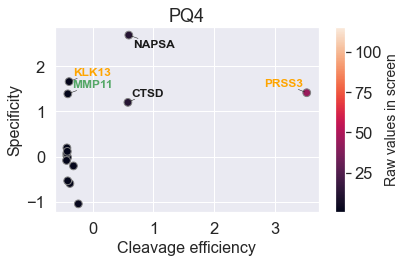

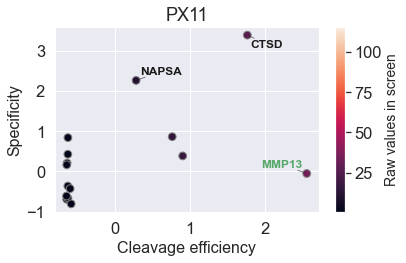

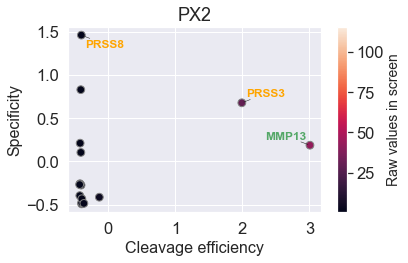

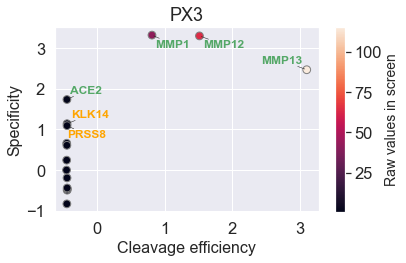

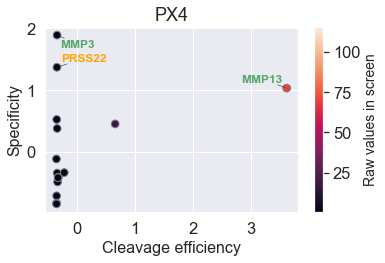

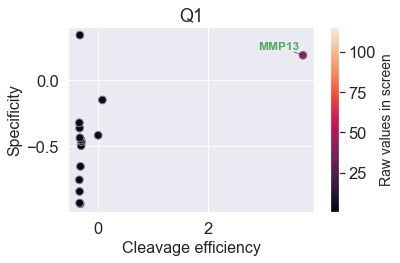

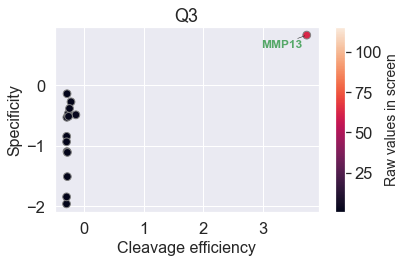

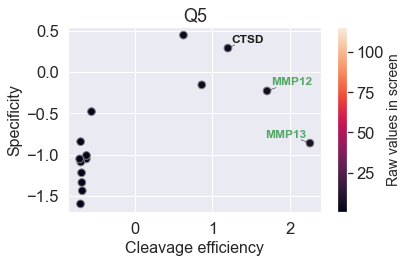

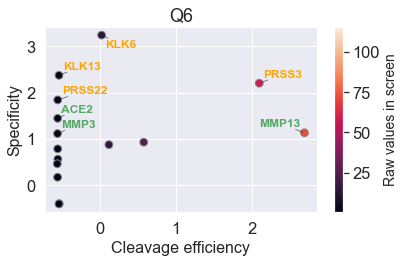

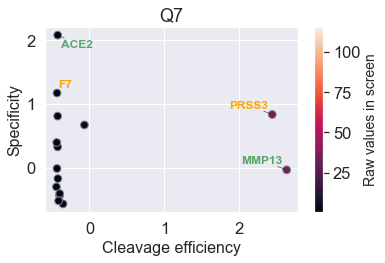

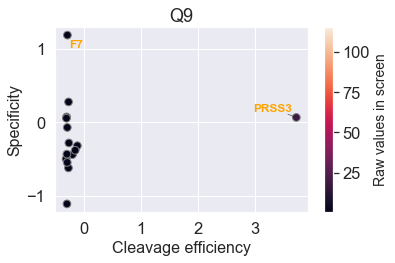

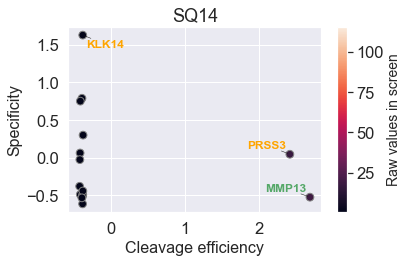

In [30]:
# We will next plot SvEs for substrates in the screen instead using 'paa.vis.plot_specificity_substrate'
paa.vis.plot_specificity_substrate(agg_df, screen_out_dir, threshold=1, close_plot=False, cmap=True)